Problem Set 1: http://cs229.stanford.edu/ps/ps1/ps1.pdf
# 4. Linear invariance of optimization algorithms

In [1]:
# import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
# read training data
train_df = pd.read_csv('http://cs229.stanford.edu/ps/ps1/quasar_train.csv', dtype=np.float32)
print(train_df.shape)
train_df.head()

(200, 450)


,1150.000,1151.000,1152.000,1153.000,1154.000,1155.000,1156.000,1157.000,1158.000,1159.000,...,1590.000,1591.000,1592.000,1593.000,1594.000,1595.000,1596.000,1597.000,1598.000,1599.000
0,0.629,1.910,0.976,2.161,0.964,2.068,1.630,1.716,2.378,-0.540,...,0.532,1.462,0.323,2.515,1.194,0.654,1.056,1.450,0.203,0.382
1,-0.161,1.830,0.609,1.932,0.932,0.857,0.978,1.032,1.793,1.455,...,0.961,1.407,1.296,0.943,1.055,2.265,1.053,1.439,0.767,-0.552
2,-0.085,-1.304,0.691,-0.800,-1.090,1.087,0.734,1.198,1.122,0.742,...,0.447,1.139,0.422,1.248,1.047,0.500,1.514,1.623,1.202,0.924
3,1.283,-0.487,0.660,0.167,-1.217,1.535,2.264,0.220,0.865,-0.723,...,0.714,1.173,1.579,0.477,0.781,0.525,2.466,1.493,1.503,0.698
4,-0.107,0.328,0.681,2.500,0.083,1.876,2.359,1.122,0.584,0.835,...,1.427,2.685,1.152,1.365,0.280,2.246,1.249,1.304,0.578,0.831


In [3]:
train_df.describe()

,1150.000,1151.000,1152.000,1153.000,1154.000,1155.000,1156.000,1157.000,1158.000,1159.000,...,1590.000,1591.000,1592.000,1593.000,1594.000,1595.000,1596.000,1597.000,1598.000,1599.000
count,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,...,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,0.437280,0.832350,0.998720,1.087760,0.810820,0.888475,0.702390,1.024510,1.134610,0.922155,...,1.157225,1.174780,1.184900,1.172655,1.176870,1.132060,1.148390,1.147795,0.839805,0.512090
std,0.550454,0.851339,1.331848,1.185321,1.150744,1.115849,1.099269,0.972242,0.852812,1.029427,...,0.508772,0.546219,0.507259,0.553776,0.482319,0.563073,0.551507,0.525677,0.607804,0.562989
min,-0.952000,-1.304000,-1.938000,-2.852000,-1.853000,-2.167000,-2.775000,-2.553000,-0.955000,-1.543000,...,-0.418000,-0.353000,-0.011000,-0.824000,0.007000,-0.798000,-0.311000,-0.096000,-1.334000,-1.051000
25%,0.009250,0.252500,0.043750,0.267500,0.080250,0.116500,0.091500,0.414750,0.479750,0.222750,...,0.835250,0.868500,0.812000,0.818500,0.841750,0.732750,0.824750,0.801250,0.463250,0.166000
50%,0.430500,0.848000,0.889500,0.908000,0.802000,0.877000,0.749000,1.021000,1.119000,0.942500,...,1.180500,1.132000,1.208000,1.225000,1.162500,1.143500,1.141000,1.146000,0.800500,0.489500
75%,0.819750,1.450750,1.832750,1.918750,1.428750,1.653000,1.459250,1.634500,1.631000,1.505750,...,1.469750,1.502500,1.543500,1.538000,1.528500,1.522250,1.531750,1.499000,1.227000,0.874250
max,2.035000,3.289000,5.700000,4.132000,4.229000,4.476000,3.241000,3.782000,3.249000,4.384000,...,2.455000,2.685000,2.552000,2.616000,2.298000,2.560000,2.702000,2.643000,2.936000,2.092000


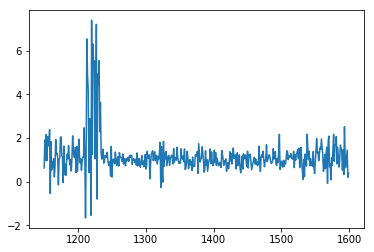

In [4]:
all_spec = train_df.columns.values.astype(np.float32)
plt.plot(all_spec, train_df.loc[0])

In [46]:
# read test data
test_df = pd.read_csv('http://cs229.stanford.edu/ps/ps1/quasar_test.csv', dtype=np.float32, names=train_df.columns)
print(test_df.shape)
test_df.head()

(51, 450)


,1150.000,1151.000,1152.000,1153.000,1154.000,1155.000,1156.000,1157.000,1158.000,1159.000,...,1590.000,1591.000,1592.000,1593.000,1594.000,1595.000,1596.000,1597.000,1598.000,1599.000
0,1150.000,1151.000,1152.000,1153.00,1154.000,1155.000,1156.000,1157.000,1158.00,1159.000,...,1590.000,1591.000,1592.000,1593.00,1594.000,1595.00,1596.000,1597.000,1598.000,1599.000
1,0.025,1.460,-0.057,1.37,2.090,1.150,-0.182,0.351,1.57,1.970,...,0.525,0.574,1.570,1.28,0.963,1.04,1.160,0.555,0.733,1.180
2,1.210,0.375,0.695,-0.09,0.275,-0.128,0.043,-0.054,1.40,1.950,...,0.658,0.579,1.670,1.23,1.230,1.19,1.220,0.932,1.280,0.338
3,1.380,-0.436,2.700,1.18,1.850,0.374,2.290,1.110,1.06,1.270,...,0.672,0.483,1.350,1.45,2.810,1.28,0.893,1.980,0.744,0.610
4,0.427,0.509,1.060,0.80,0.537,0.288,2.790,2.120,1.51,-0.937,...,0.928,1.020,0.462,1.04,1.070,1.64,1.250,0.706,0.673,1.480


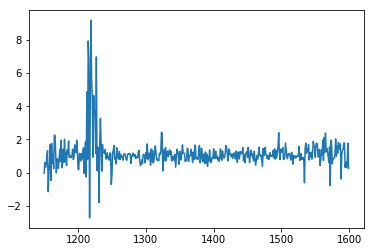

In [47]:
plt.plot(all_spec, test_df.loc[49])

## 5.a.i.

$$
\begin{align}
J(\theta) &= (X\theta - \vec{y})^T W (X\theta - \vec{y}) \\
&= \sum_{ij}^{m} W_{ij} (X\theta - \vec{y})_{i} (X\theta - \vec{y})_{j} \\ 
&= \sum_{ij}^{m} W_{ij} (\theta^T x^{(i)} - y^{(i)}) (\theta^T x^{(j)} - y^{(j)}) \\ 
\end{align}
$$

if $W$ is diagonal, elements of $J(\theta)$ become 0 except those that are at $i = j$.

so,
$$
\begin{align}
J(\theta) &= \sum_{i}^{m} W_{ii} (\theta^T x^{(i)} - y^{(i)})^2 \\ 
\end{align}
$$

$$W_{ii} = \frac{1}{2}w_{i}$$

## 5.a.ii.

$$
\begin{align}
\nabla_{\theta} J(\theta)
&= 2 (W (X\theta - \vec{y}))^T X \\
\end{align}
$$

let $\nabla_{\theta} J(\theta) = 0$,

$$
\begin{align}
   2 (W (X\theta - \vec{y}))^T X &= 0 \\
   X^T(W (X\theta - \vec{y})) &= 0 \\
   X^T W X\theta - X^T W \vec{y} &= 0 \\
   X^T W X\theta &= X^T W \vec{y} \\
   \theta &= (X^T W X)^{-1} X^T W \vec{y}
\end{align}
$$

when $W = I$,

$$\theta = (X^T X)^{-1} X^T \vec{y}$$

## 5.a.iii.

$$
\begin{align}
l &= \mathrm{log} \prod_{i=1}^{m} p(y^{(i)}|x^{(i)}; \theta) \\
&= \mathrm{log} \prod_{i=1}^{m} \frac{1}{\sqrt{2\pi} \sigma^{(i)}} \mathrm{exp}\bigg (- \frac{(y^{(i)} - \theta^Tx^{(i)})^2}{2(\sigma^{(i)})^2} \bigg) \\
&= \sum_{i=1}^{m} \mathrm{log}\frac{1}{\sqrt{2\pi} \sigma^{(i)}} - \frac{1}{2} \sum_{i=1}^{m} \frac{1}{(\sigma^{(i)})^2} (y^{(i)} - \theta^Tx^{(i)})^2
\end{align}
$$

Comparing to

$$J(\theta) = \frac{1}{2}\sum_{i}^{m} w_{i} (\theta^T x^{(i)} - y^{(i)})^2$$

the first part is constant, the minus sign change maximize to minimize, $w_i = \frac{1}{(\sigma^{(i)})^2}$

## 5.b.i.

In [48]:
train_df.head(1)

,1150.000,1151.000,1152.000,1153.000,1154.000,1155.000,1156.000,1157.000,1158.000,1159.000,...,1590.000,1591.000,1592.000,1593.000,1594.000,1595.000,1596.000,1597.000,1598.000,1599.000
0,0.629,1.91,0.976,2.161,0.964,2.068,1.63,1.716,2.378,-0.54,...,0.532,1.462,0.323,2.515,1.194,0.654,1.056,1.45,0.203,0.382


$$\theta = (X^T W X)^{-1} X^T W \vec{y}$$
$$\theta = (X^T X)^{-1} X^T \vec{y}$$

In [49]:
def optimize(X, y, W = None):
    if W is None:
        return np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)
    return np.linalg.inv(X.T.dot(W).dot(X)).dot(X.T).dot(W).dot(y)

In [50]:
def make_X():
    X = np.ones(train_df.shape[1])
    X = np.column_stack([X, train_df.columns.values.astype(np.float32)])
    return X
def make_y(i):
    return train_df.loc[i,:].as_matrix()

In [51]:
X0 = make_X()
y0 = make_y(0)
print(X0.shape, y0.shape)
theta = optimize(X0, y0, None)
print(theta)

(450, 2) (450,)
[  2.51339907e+00  -9.81122154e-04]


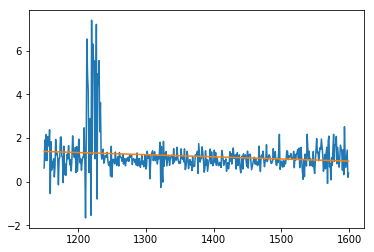

In [52]:
plt.plot(all_spec, train_df.loc[0].values)
plt.plot(all_spec, X0.dot(theta))

## 5.b.ii.

In [53]:
def calculate_weights(X_query, x_eval, tau = 5):
    return np.diag(np.exp(-(X_query[:,1] - x_eval[1]) ** 2 / (2 * (tau ** 2))))

In [54]:
# a new regression fit for every data point
def calculate_regression(X, y, tau):
    y_hat = []
    for _, x_eval in enumerate(X):
        W = calculate_weights(X0, x_eval, tau)
        theta = optimize(X, y, W)
        y_hat.append(theta.dot(x_eval))
    return y_hat

In [55]:
y_hat = calculate_regression(X0, y0, 5)

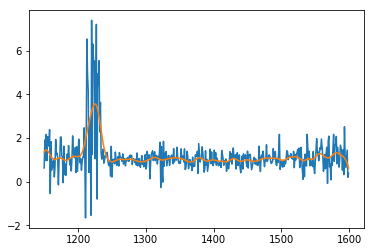

In [56]:
plt.plot(all_spec, train_df.loc[0].values)
plt.plot(all_spec, y_hat)

## 5.b.iii.

In [57]:
y_hat1 = calculate_regression(X0, y0, 1)
y_hat2 = calculate_regression(X0, y0, 10)
y_hat3 = calculate_regression(X0, y0, 100)
y_hat4 = calculate_regression(X0, y0, 1000)

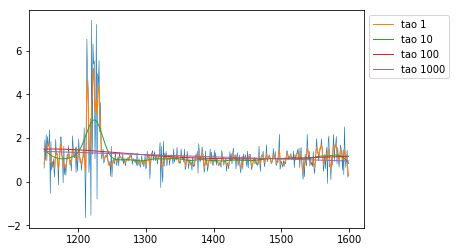

In [58]:
plt.plot(all_spec, train_df.loc[0].values, lw = 0.6)
plt.plot(all_spec, y_hat1, label='tao {0}'.format(1), lw=1)
plt.plot(all_spec, y_hat2, label='tao {0}'.format(10), lw=1)
plt.plot(all_spec, y_hat3, label='tao {0}'.format(100), lw=1)
plt.plot(all_spec, y_hat4, label='tao {0}'.format(1000), lw=1)
plt.legend(bbox_to_anchor=(1,1), loc="upper left")
plt.show()

As $\tau$ getting smaller, the locally weighted linear regression line is more sensitive to the distance between the data point to be evaluated and the training data.$

## 5.c.i.

In [59]:
# smooth
def smooth(data, tau = 5):
    y_hats = []
    for i, row in data.iterrows():
        X = make_X()
        y = make_y(i)
        y_hat = calculate_regression(X, y, 5)
        y_hats.append(y_hat)
    return pd.DataFrame(y_hats, columns = data.columns.values)

In [60]:
train_df.head()

,1150.000,1151.000,1152.000,1153.000,1154.000,1155.000,1156.000,1157.000,1158.000,1159.000,...,1590.000,1591.000,1592.000,1593.000,1594.000,1595.000,1596.000,1597.000,1598.000,1599.000
0,0.629,1.910,0.976,2.161,0.964,2.068,1.630,1.716,2.378,-0.540,...,0.532,1.462,0.323,2.515,1.194,0.654,1.056,1.450,0.203,0.382
1,-0.161,1.830,0.609,1.932,0.932,0.857,0.978,1.032,1.793,1.455,...,0.961,1.407,1.296,0.943,1.055,2.265,1.053,1.439,0.767,-0.552
2,-0.085,-1.304,0.691,-0.800,-1.090,1.087,0.734,1.198,1.122,0.742,...,0.447,1.139,0.422,1.248,1.047,0.500,1.514,1.623,1.202,0.924
3,1.283,-0.487,0.660,0.167,-1.217,1.535,2.264,0.220,0.865,-0.723,...,0.714,1.173,1.579,0.477,0.781,0.525,2.466,1.493,1.503,0.698
4,-0.107,0.328,0.681,2.500,0.083,1.876,2.359,1.122,0.584,0.835,...,1.427,2.685,1.152,1.365,0.280,2.246,1.249,1.304,0.578,0.831


In [61]:
smooth_train_df = smooth(train_df)
smooth_train_df.head()

,1150.000,1151.000,1152.000,1153.000,1154.000,1155.000,1156.000,1157.000,1158.000,1159.000,...,1590.000,1591.000,1592.000,1593.000,1594.000,1595.000,1596.000,1597.000,1598.000,1599.000
0,1.354578,1.411428,1.444183,1.454483,1.444648,1.417679,1.377181,1.327194,1.271964,1.215665,...,1.177875,1.153110,1.123592,1.087366,1.042372,0.986544,0.917909,0.834687,0.735374,0.618808
1,0.863030,0.934992,0.987481,1.024020,1.048026,1.062757,1.071234,1.076121,1.079601,1.083260,...,1.152844,1.144768,1.134039,1.116679,1.088010,1.042846,0.975691,0.880942,0.753086,0.586869
2,-0.541991,-0.387920,-0.237598,-0.094958,0.037007,0.156429,0.262619,0.355977,0.437780,0.509873,...,0.990094,0.992039,1.001164,1.017772,1.041702,1.072248,1.108120,1.147456,1.187883,1.226617
3,0.315311,0.350667,0.399682,0.457496,0.520002,0.583942,0.646924,0.707364,0.764344,0.817449,...,1.016987,1.037521,1.064515,1.097674,1.136054,1.178049,1.221415,1.263298,1.300281,1.328453
4,0.557010,0.719105,0.844582,0.937089,1.001121,1.041749,1.064305,1.074050,1.075866,1.074013,...,1.359554,1.340186,1.317625,1.290164,1.255991,1.213389,1.160878,1.097299,1.021835,0.933995


In [62]:
smooth_train_df.shape

(200, 450)

In [63]:
smooth_test_df = smooth(test_df)
smooth_test_df.head()

,1150.000,1151.000,1152.000,1153.000,1154.000,1155.000,1156.000,1157.000,1158.000,1159.000,...,1590.000,1591.000,1592.000,1593.000,1594.000,1595.000,1596.000,1597.000,1598.000,1599.000
0,1.354578,1.411428,1.444183,1.454483,1.444648,1.417679,1.377181,1.327194,1.271964,1.215665,...,1.177875,1.153110,1.123592,1.087366,1.042372,0.986544,0.917909,0.834687,0.735374,0.618808
1,0.863030,0.934992,0.987481,1.024020,1.048026,1.062757,1.071234,1.076121,1.079601,1.083260,...,1.152844,1.144768,1.134039,1.116679,1.088010,1.042846,0.975691,0.880942,0.753086,0.586869
2,-0.541991,-0.387920,-0.237598,-0.094958,0.037007,0.156429,0.262619,0.355977,0.437780,0.509873,...,0.990094,0.992039,1.001164,1.017772,1.041702,1.072248,1.108120,1.147456,1.187883,1.226617
3,0.315311,0.350667,0.399682,0.457496,0.520002,0.583942,0.646924,0.707364,0.764344,0.817449,...,1.016987,1.037521,1.064515,1.097674,1.136054,1.178049,1.221415,1.263298,1.300281,1.328453
4,0.557010,0.719105,0.844582,0.937089,1.001121,1.041749,1.064305,1.074050,1.075866,1.074013,...,1.359554,1.340186,1.317625,1.290164,1.255991,1.213389,1.160878,1.097299,1.021835,0.933995


In [64]:
smooth_test_df.shape

(51, 450)

## 5.c.ii.

In [65]:
# left part split
wave_left = smooth_train_df.loc[:, :'1201.00']
wave_left.head()

,1150.000,1151.000,1152.000,1153.000,1154.000,1155.000,1156.000,1157.000,1158.000,1159.000,...,1191.000,1192.000,1193.000,1194.000,1195.000,1196.000,1197.000,1198.000,1199.000,1200.000
0,1.354578,1.411428,1.444183,1.454483,1.444648,1.417679,1.377181,1.327194,1.271964,1.215665,...,1.136843,1.149774,1.158640,1.163390,1.164335,1.162138,1.157793,1.152597,1.148146,1.146366
1,0.863030,0.934992,0.987481,1.024020,1.048026,1.062757,1.071234,1.076121,1.079601,1.083260,...,1.045348,1.017210,0.990298,0.966817,0.948897,0.938514,0.937495,0.947588,0.970594,1.008542
2,-0.541991,-0.387920,-0.237598,-0.094958,0.037007,0.156429,0.262619,0.355977,0.437780,0.509873,...,0.920982,0.905491,0.893571,0.885759,0.882741,0.885431,0.895010,0.912926,0.940875,0.980832
3,0.315311,0.350667,0.399682,0.457496,0.520002,0.583942,0.646924,0.707364,0.764344,0.817449,...,0.843590,0.847304,0.858892,0.879226,0.908617,0.946794,0.993048,1.046559,1.106828,1.174126
4,0.557010,0.719105,0.844582,0.937089,1.001121,1.041749,1.064305,1.074050,1.075866,1.074013,...,0.957604,0.952201,0.947462,0.944290,0.943753,0.947231,0.956586,0.974332,1.003762,1.049020


In [66]:
wave_left.shape

(200, 51)

In [76]:
# right part split
wave_right = smooth_train_df.loc[:, '1300.00':]
wave_right.head()

,1300.000,1301.000,1302.000,1303.000,1304.000,1305.000,1306.000,1307.000,1308.000,1309.000,...,1590.000,1591.000,1592.000,1593.000,1594.000,1595.000,1596.000,1597.000,1598.000,1599.000
0,0.946472,0.957283,0.969366,0.982726,0.997343,1.013109,1.029753,1.046794,1.063527,1.079083,...,1.177875,1.153110,1.123592,1.087366,1.042372,0.986544,0.917909,0.834687,0.735374,0.618808
1,1.203703,1.227041,1.249196,1.268141,1.281898,1.288832,1.287903,1.278840,1.262199,1.239307,...,1.152844,1.144768,1.134039,1.116679,1.088010,1.042846,0.975691,0.880942,0.753086,0.586869
2,1.106087,1.119310,1.128331,1.133473,1.135440,1.135175,1.133679,1.131820,1.130196,1.129066,...,0.990094,0.992039,1.001164,1.017772,1.041702,1.072248,1.108120,1.147456,1.187883,1.226617
3,0.904190,0.910713,0.922625,0.940688,0.964966,0.994705,1.028366,1.063797,1.098521,1.130064,...,1.016987,1.037521,1.064515,1.097674,1.136054,1.178049,1.221415,1.263298,1.300281,1.328453
4,1.087077,1.095471,1.101734,1.105221,1.105651,1.103221,1.098621,1.092940,1.087472,1.083462,...,1.359554,1.340186,1.317625,1.290164,1.255991,1.213389,1.160878,1.097299,1.021835,0.933995


In [77]:
wave_right.shape

(200, 300)

In [78]:
left_spec = wave_left.columns.values.astype(np.float32)
right_spec = wave_left.columns.values.astype(np.float32)

In [79]:
# select the neighbors based on distances calculated from the right spectrue,
# and then calculate the weighted (based on distances) average of left spectrum
def ker(t):
    return np.max(1 - t, 0)

def predict(todo_right, num_neighbors = 3):
    errors = []
    preds = []
    for k, row in todo_right.iterrows():
        dists = ((wave_right - row) ** 2).sum(axis = 1)
        #if k == 1:
        #    print(wave_right - row)
        max_dist = dists.max()
        neigh_select = dists.sort_values()[:num_neighbors]
        p1 = np.sum([ker(d / max_dist) * wave_left.loc[idx] for (idx, d) in neigh_select.iteritems()], axis=0) 
        p2 = np.sum([ker(d / max_dist) for (idx, d) in neigh_select.iteritems()])
        f_left_hat = p1 / p2
        preds.append(f_left_hat)
        error = np.sum((f_left_hat - wave_left.loc[k]) ** 2)
        errors.append(error)
    return errors, preds

In [80]:
errors, preds = predict(wave_right, 3)
np.mean(errors)

1.0751423559564184

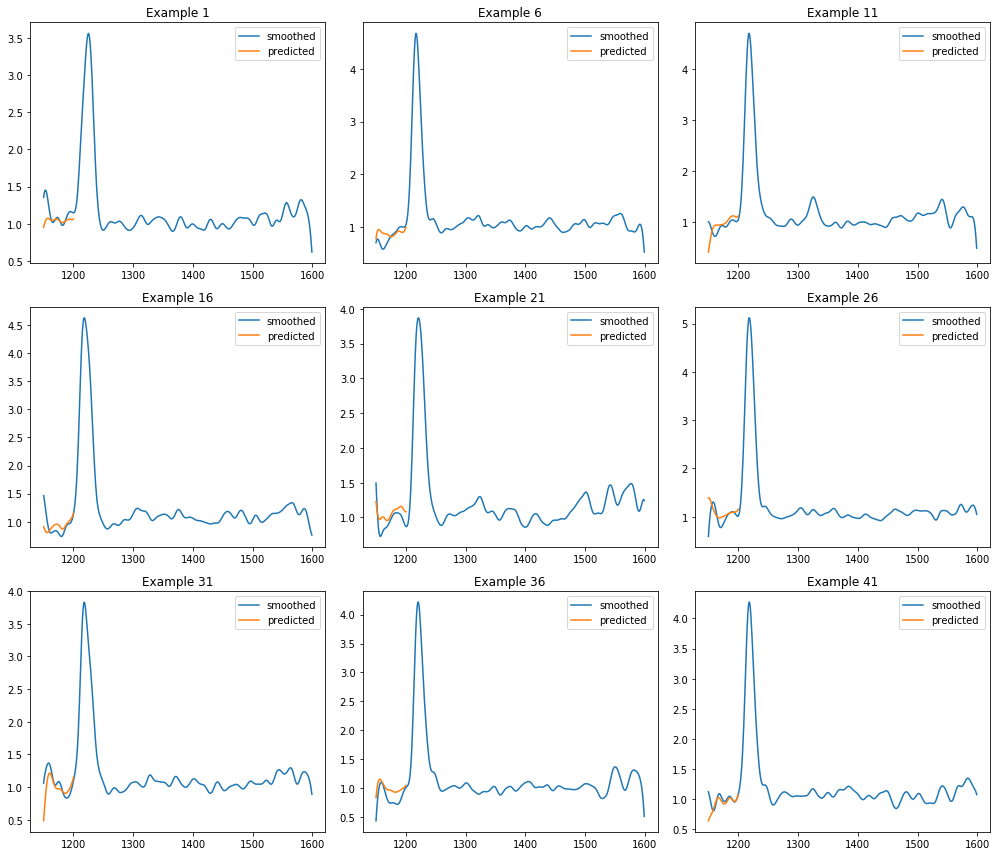

In [81]:
# visualize training
fig, axes = plt.subplots(3, 3, figsize=(14, 12))
axes = axes.ravel()

for k, idx in enumerate([0, 5, 10, 15, 20, 25, 30, 35, 40]):
    ax = axes[k]
    ax.plot(all_spec, smooth_train_df.loc[idx], label='smoothed')
    ax.plot(left_spec, preds[idx], label='predicted')
    ax.legend()
    ax.set_title('Example {0}'.format(idx + 1))
plt.tight_layout()

## 5.c.iii.

In [82]:
# training csv with header like '1300.000', test csv with head like '1300.00'
# cost me 2 hours to notice that!
test_wave_left = smooth_test_df.loc[:, :'1200.000']
print(test_wave_left.shape)
test_wave_right = smooth_test_df.loc[:, '1300.000':]
print(test_wave_right.shape)
test_errors, test_preds = predict(test_wave_right, 3)

(51, 51)
(51, 300)


In [83]:
np.mean(test_errors)

1.1735503198085249

In [84]:
test_left_spec = test_wave_left.columns.values.astype(np.float32)
test_right_spec = test_wave_right.columns.values.astype(np.float32)

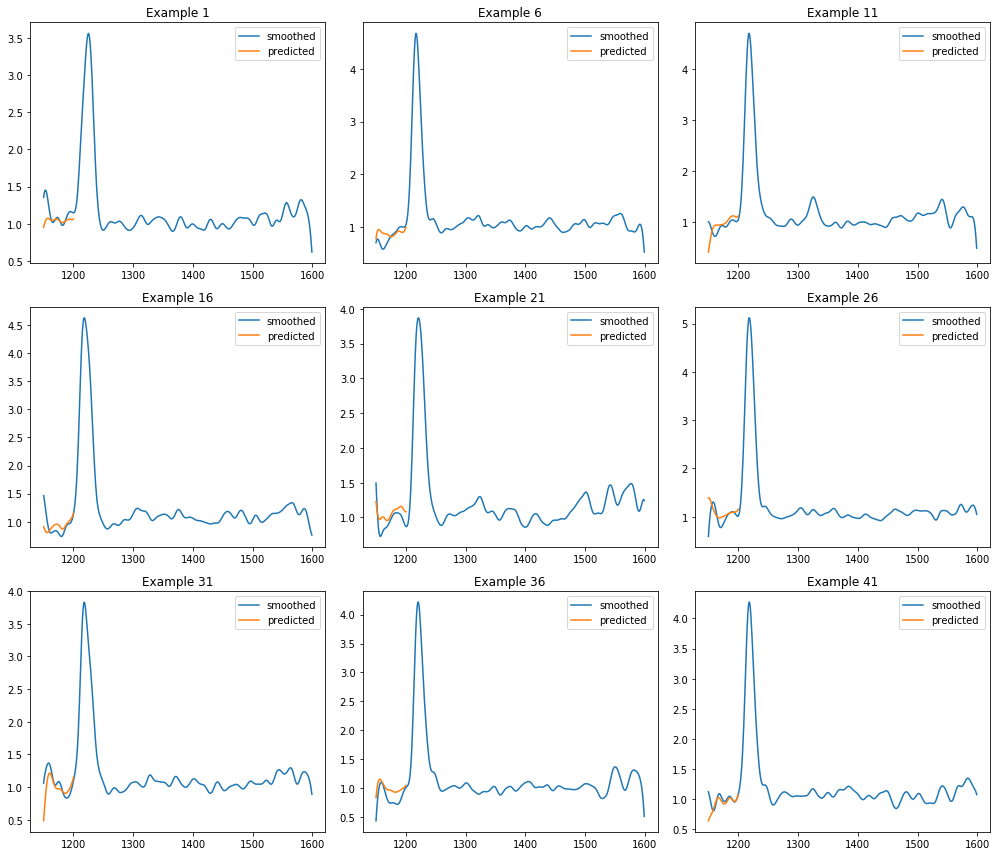

In [85]:
# visualize test
fig, axes = plt.subplots(3, 3, figsize=(14, 12))
axes = axes.ravel()

for k, idx in enumerate([0, 5, 10, 15, 20, 25, 30, 35, 40]):
    ax = axes[k]
    ax.plot(all_spec, smooth_test_df.loc[idx], label='smoothed')
    ax.plot(test_left_spec, test_preds[idx], label='predicted')
    ax.legend()
    ax.set_title('Example {0}'.format(idx + 1))
plt.tight_layout()